In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']  = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df = pd.read_csv('crime_data.csv')
df
df.drop(columns="Unnamed: 0",axis=1,inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


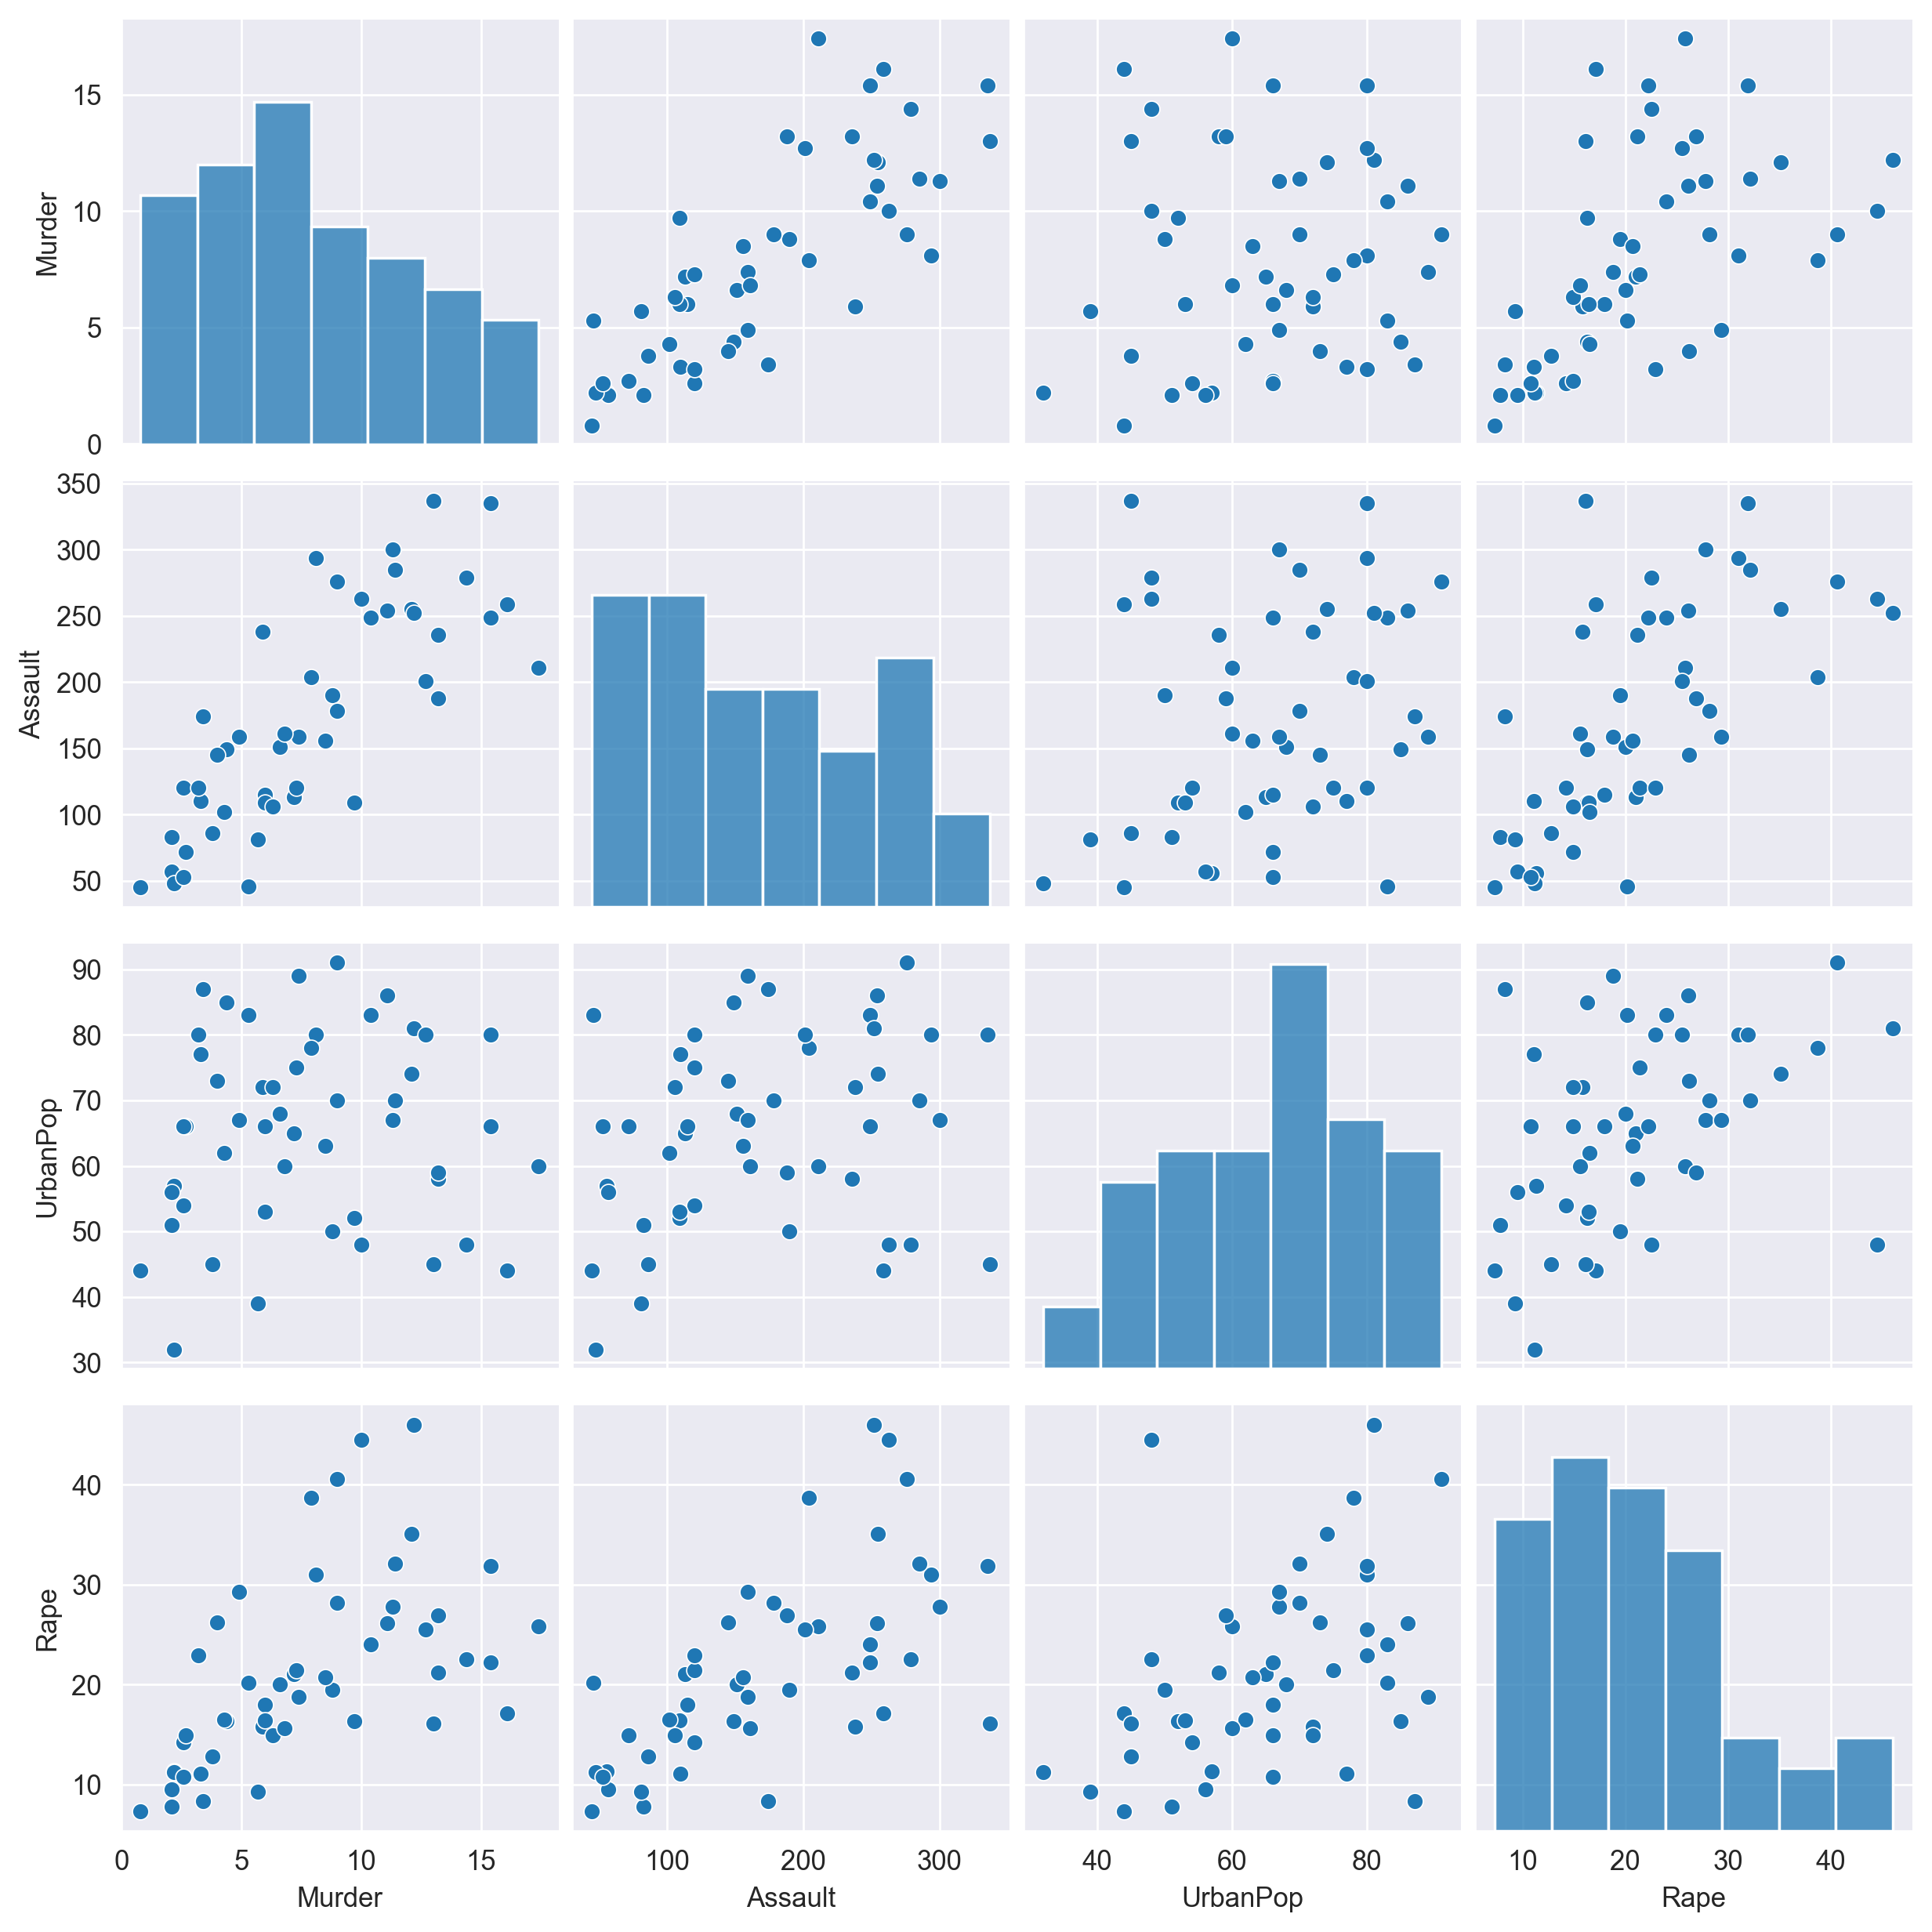

In [6]:
sns.pairplot(df)

In [7]:
#Standardization
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [8]:
#Model Building
km = KMeans()
y = km.fit_predict(x)

In [9]:
#cluster centre
km.cluster_centers_

array([[-0.13215521, -0.21968024, -0.22166938, -0.12502608],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.16843924, -1.14052421, -0.37498964, -0.90219046],
       [ 0.48054905,  1.03563542,  1.06495197,  1.83860491],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [-1.12901195, -1.2383019 , -1.62883218, -1.24586837],
       [ 0.98846527,  1.2109888 ,  0.84628556,  0.71913524],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

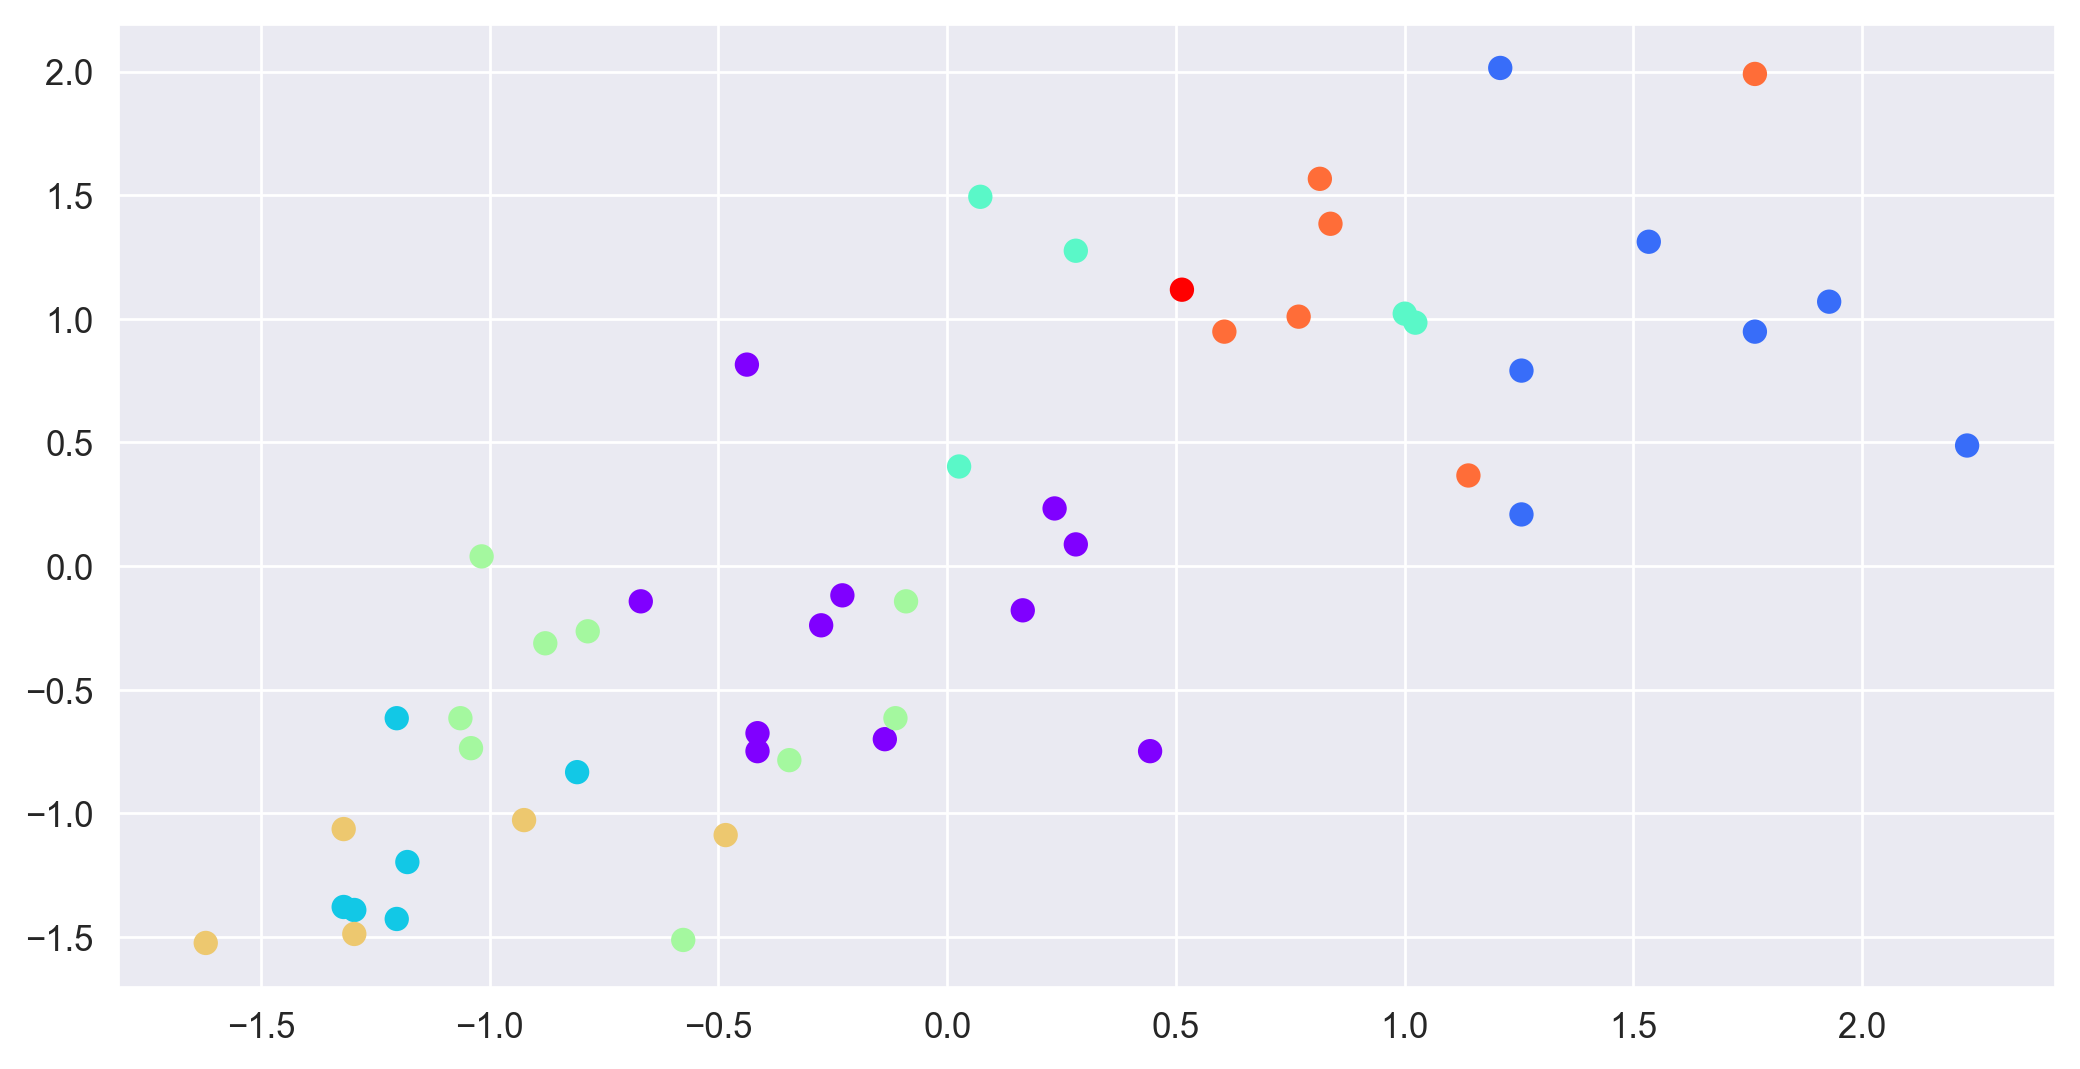

In [10]:
#Visualize the clusters
plt.scatter(x[:,0],x[:,1],c = y, cmap='rainbow')

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_score(x,y)

0.2417208542328015

In [13]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [14]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 51.47632738632482,
 46.09654364161875,
 39.041292494974435,
 35.84718747134726,
 31.793964544595838,
 28.7325980144647,
 25.298777981852005,
 22.68079536556228,
 20.81333718666222,
 20.241800363892814,
 18.428162874666874,
 17.382372975332125,
 16.574340770249762,
 15.546532057008381,
 13.711734605784716]

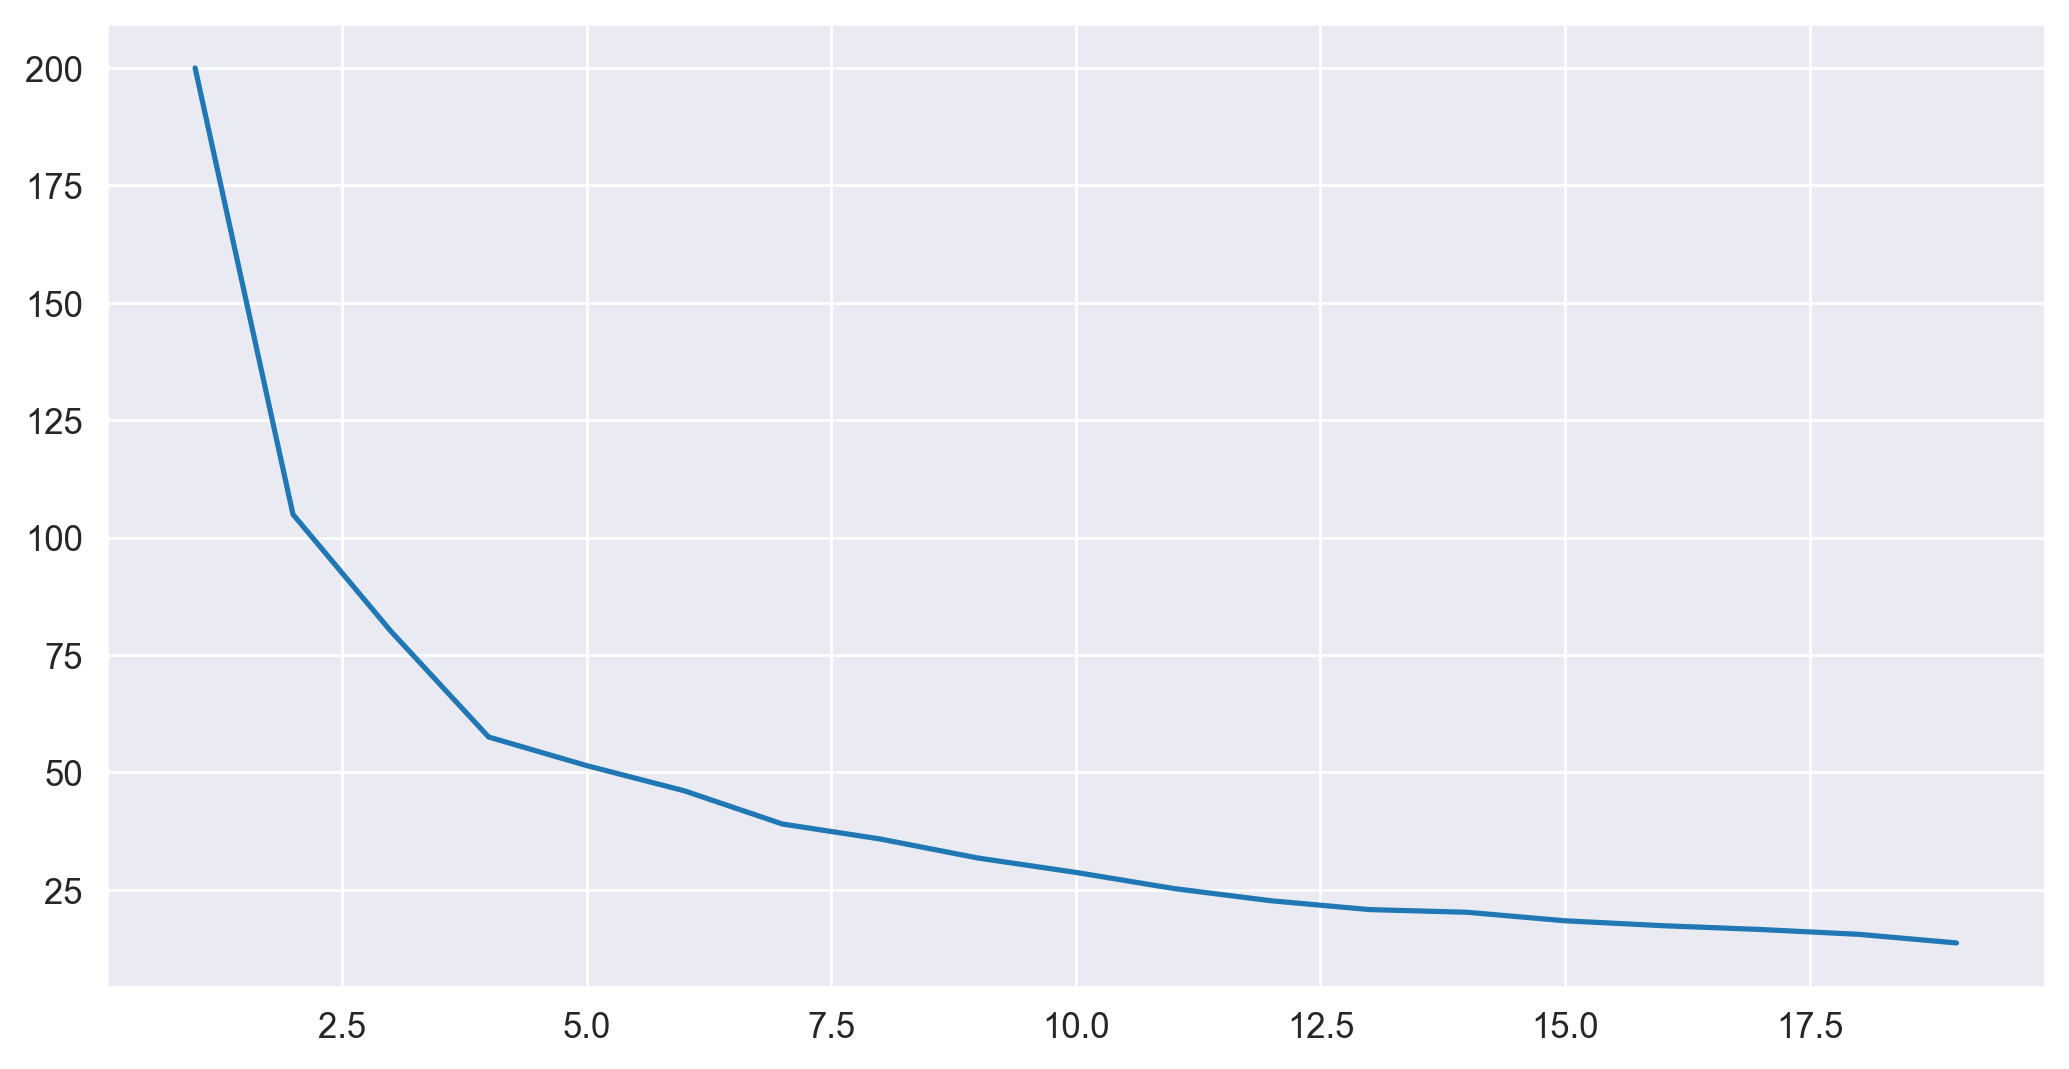

In [15]:
plt.plot(range(1,20),wcss)

# Final Model

In [16]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

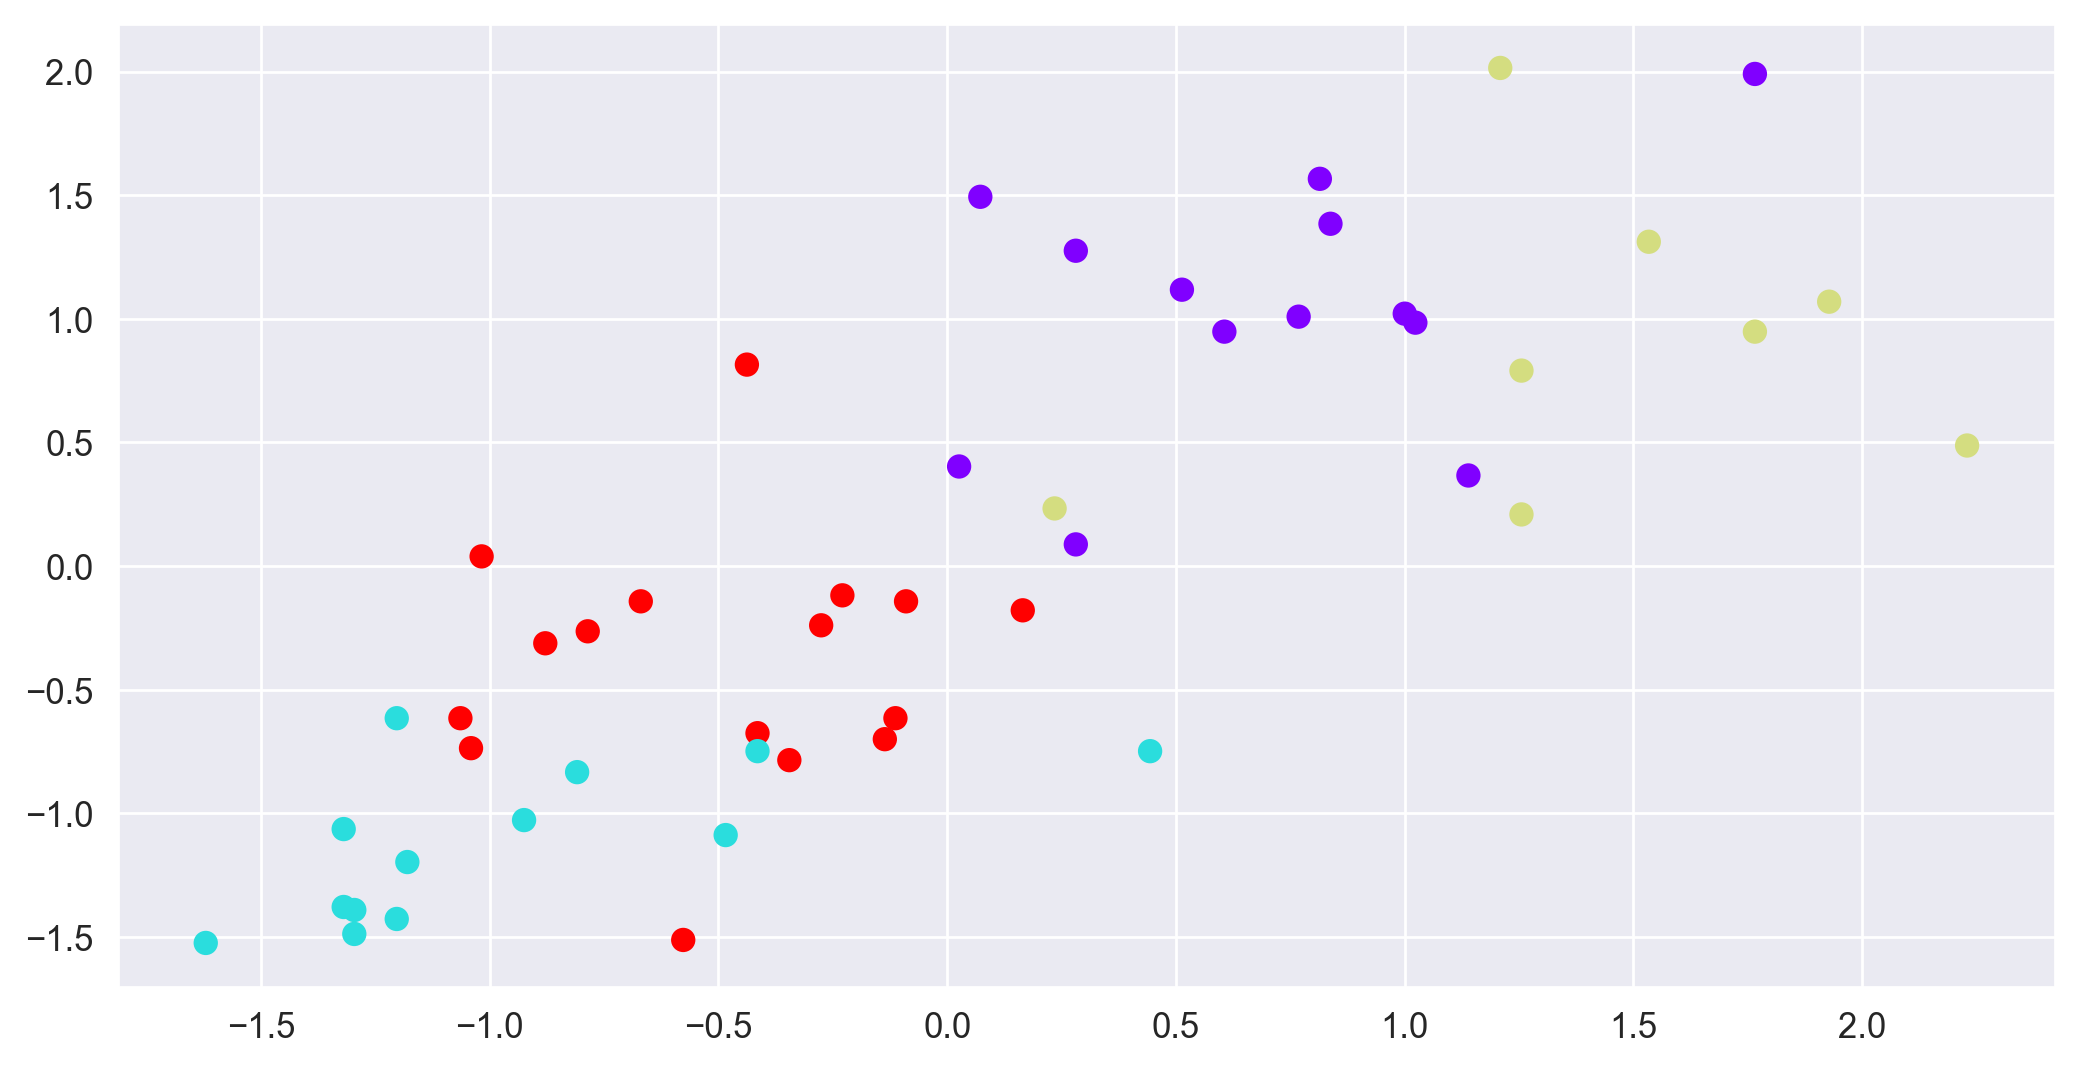

In [17]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')

In [18]:
km.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

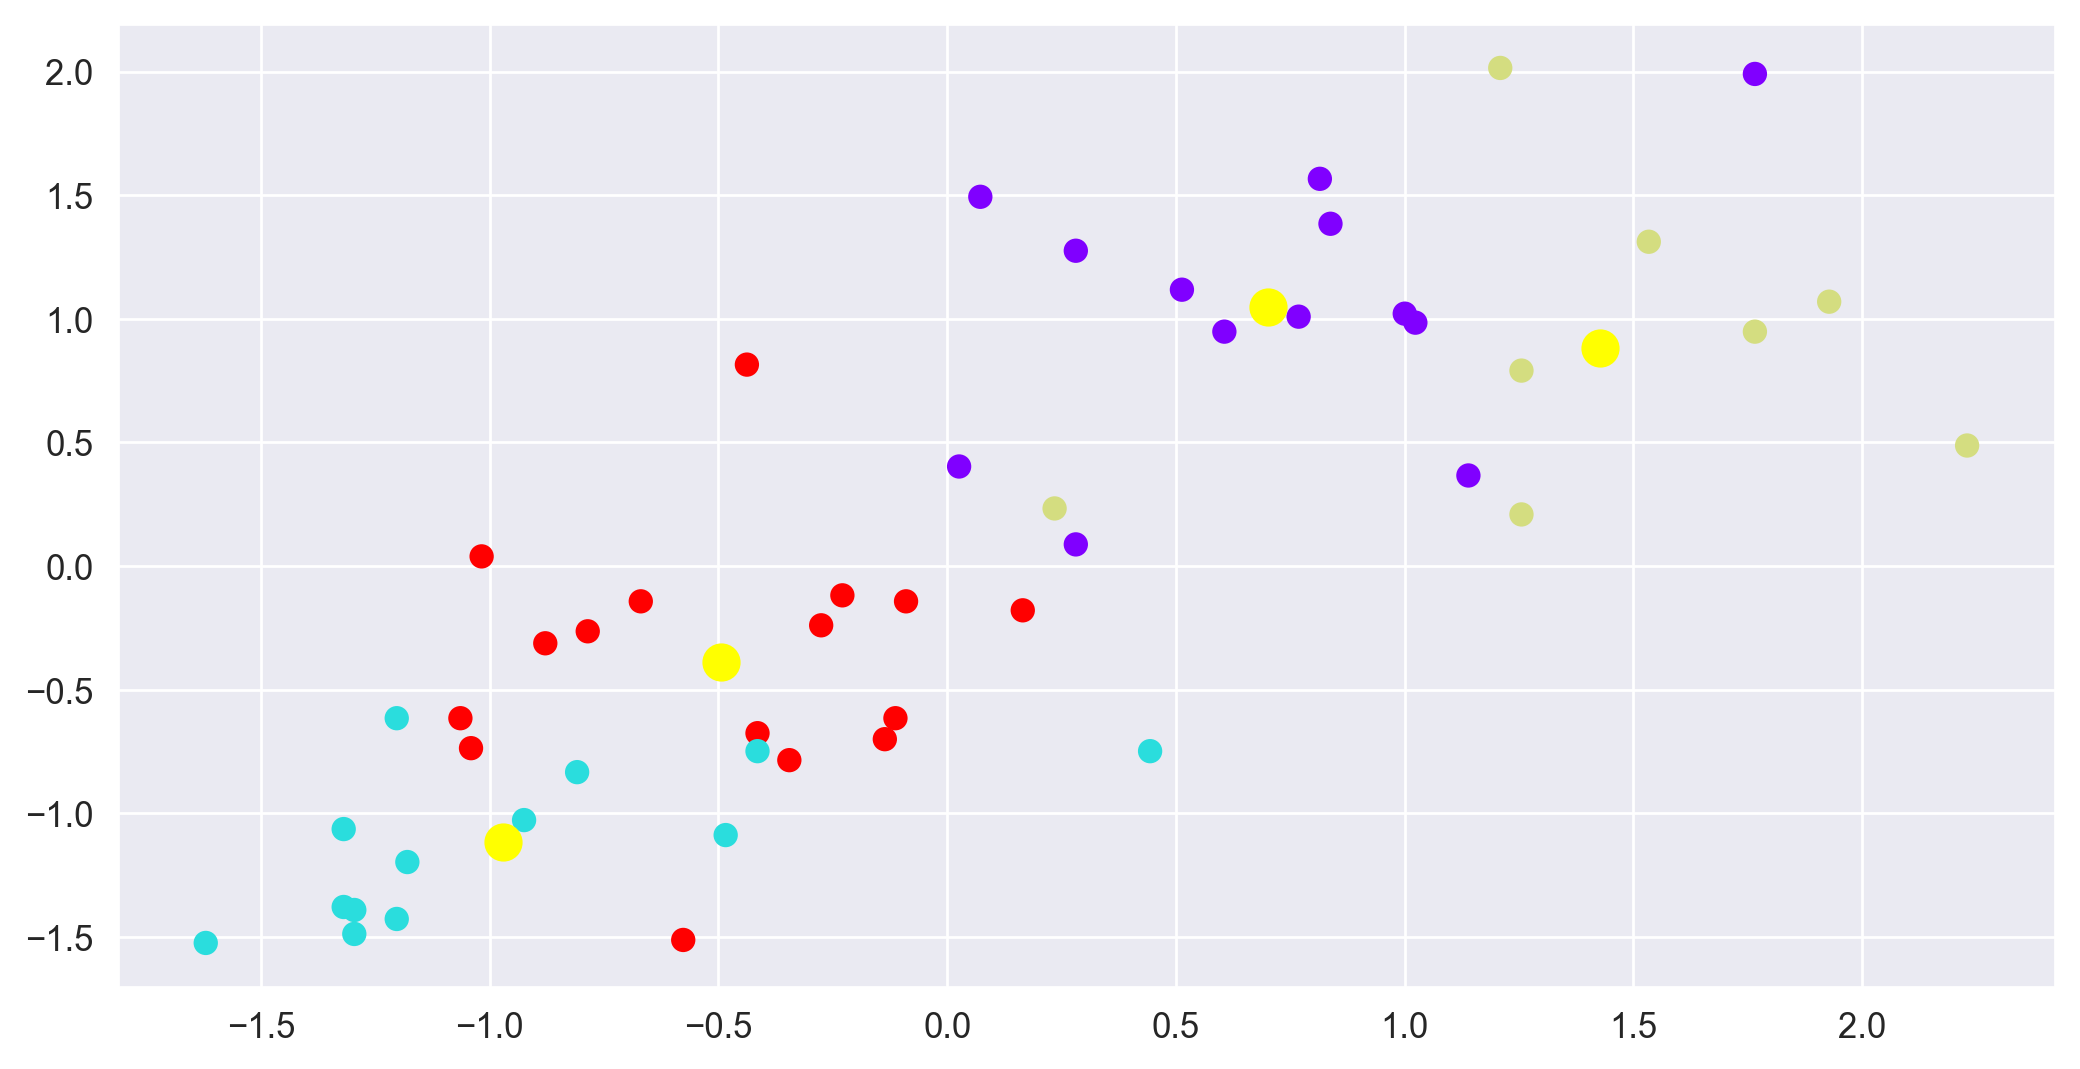

In [19]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [20]:
silhouette_score(x,ypred)

0.33968891433344395

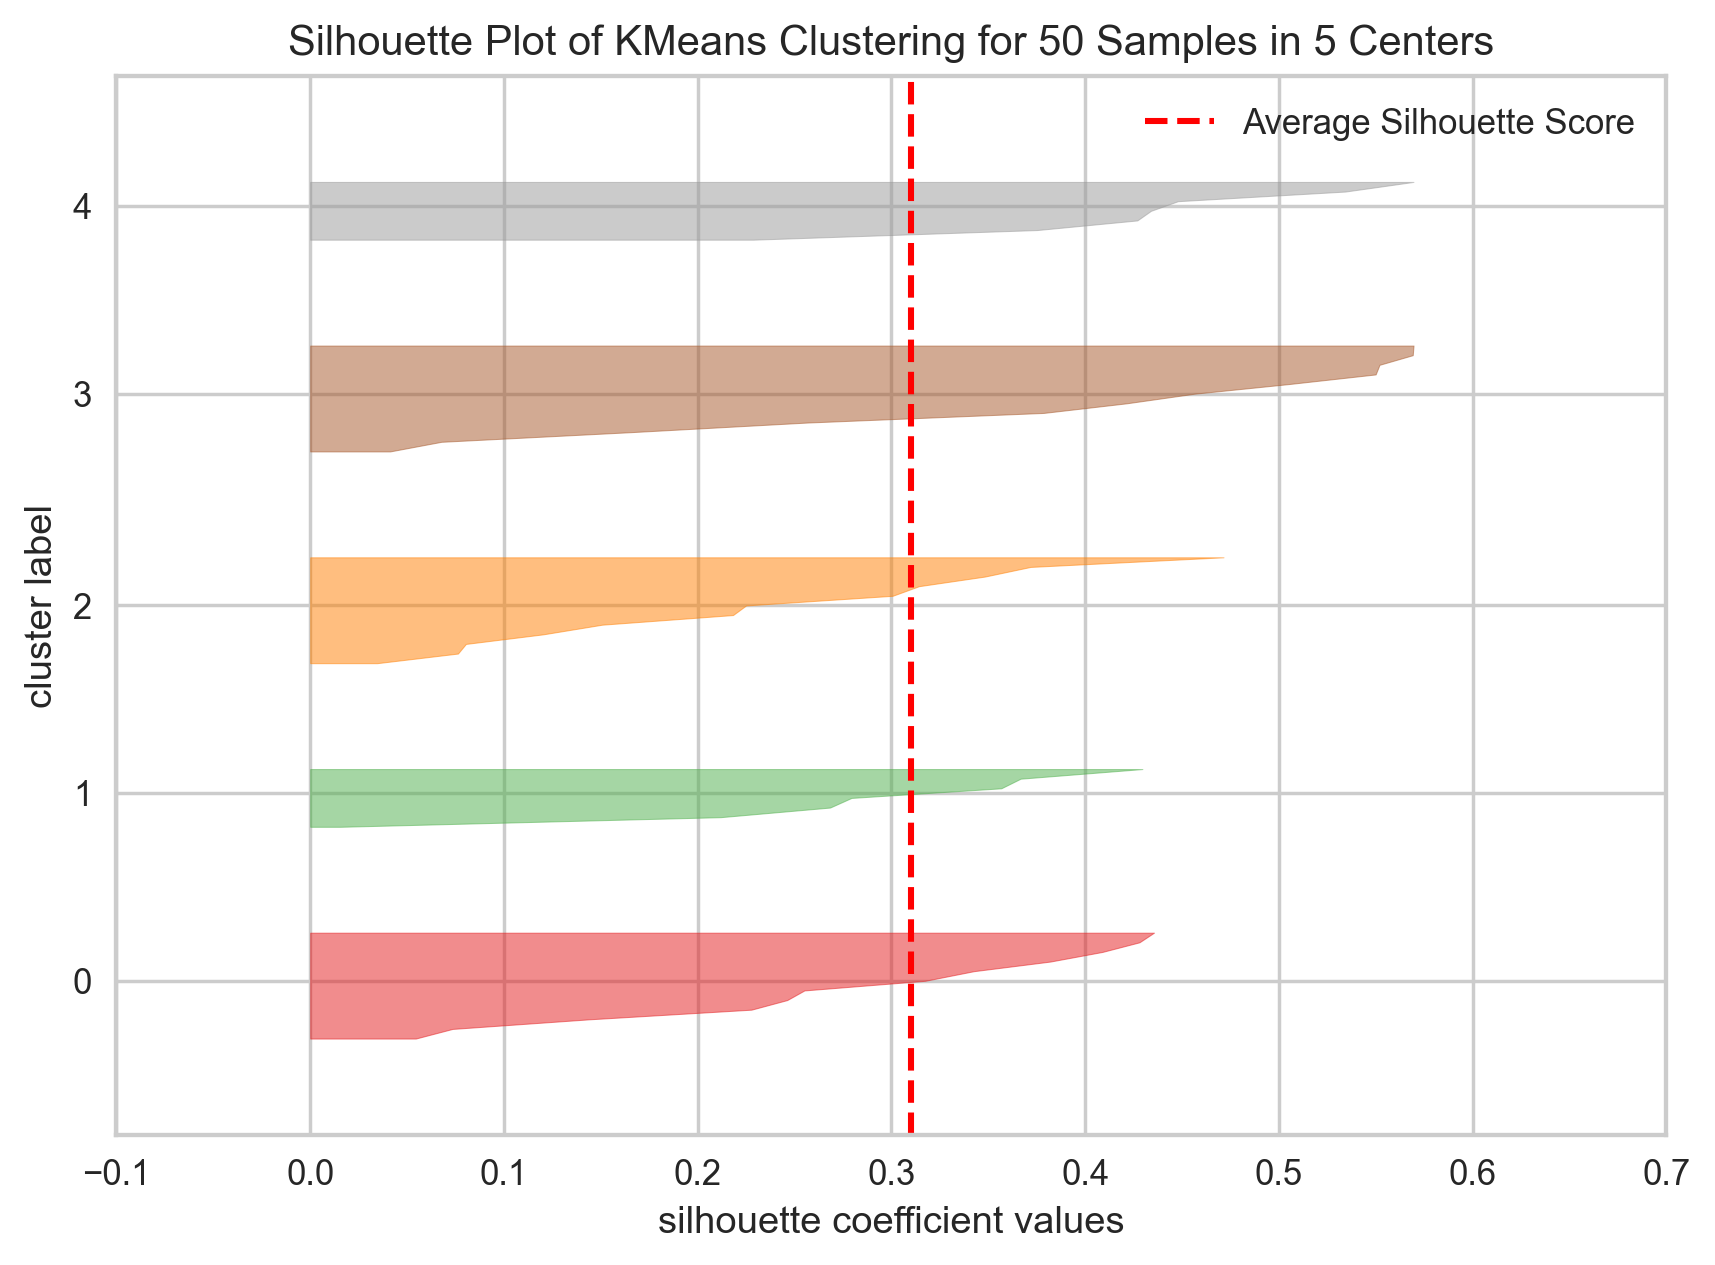

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
model = SilhouetteVisualizer(KMeans(n_clusters=5))
vis = model.fit(x)
vis.show()

In [24]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

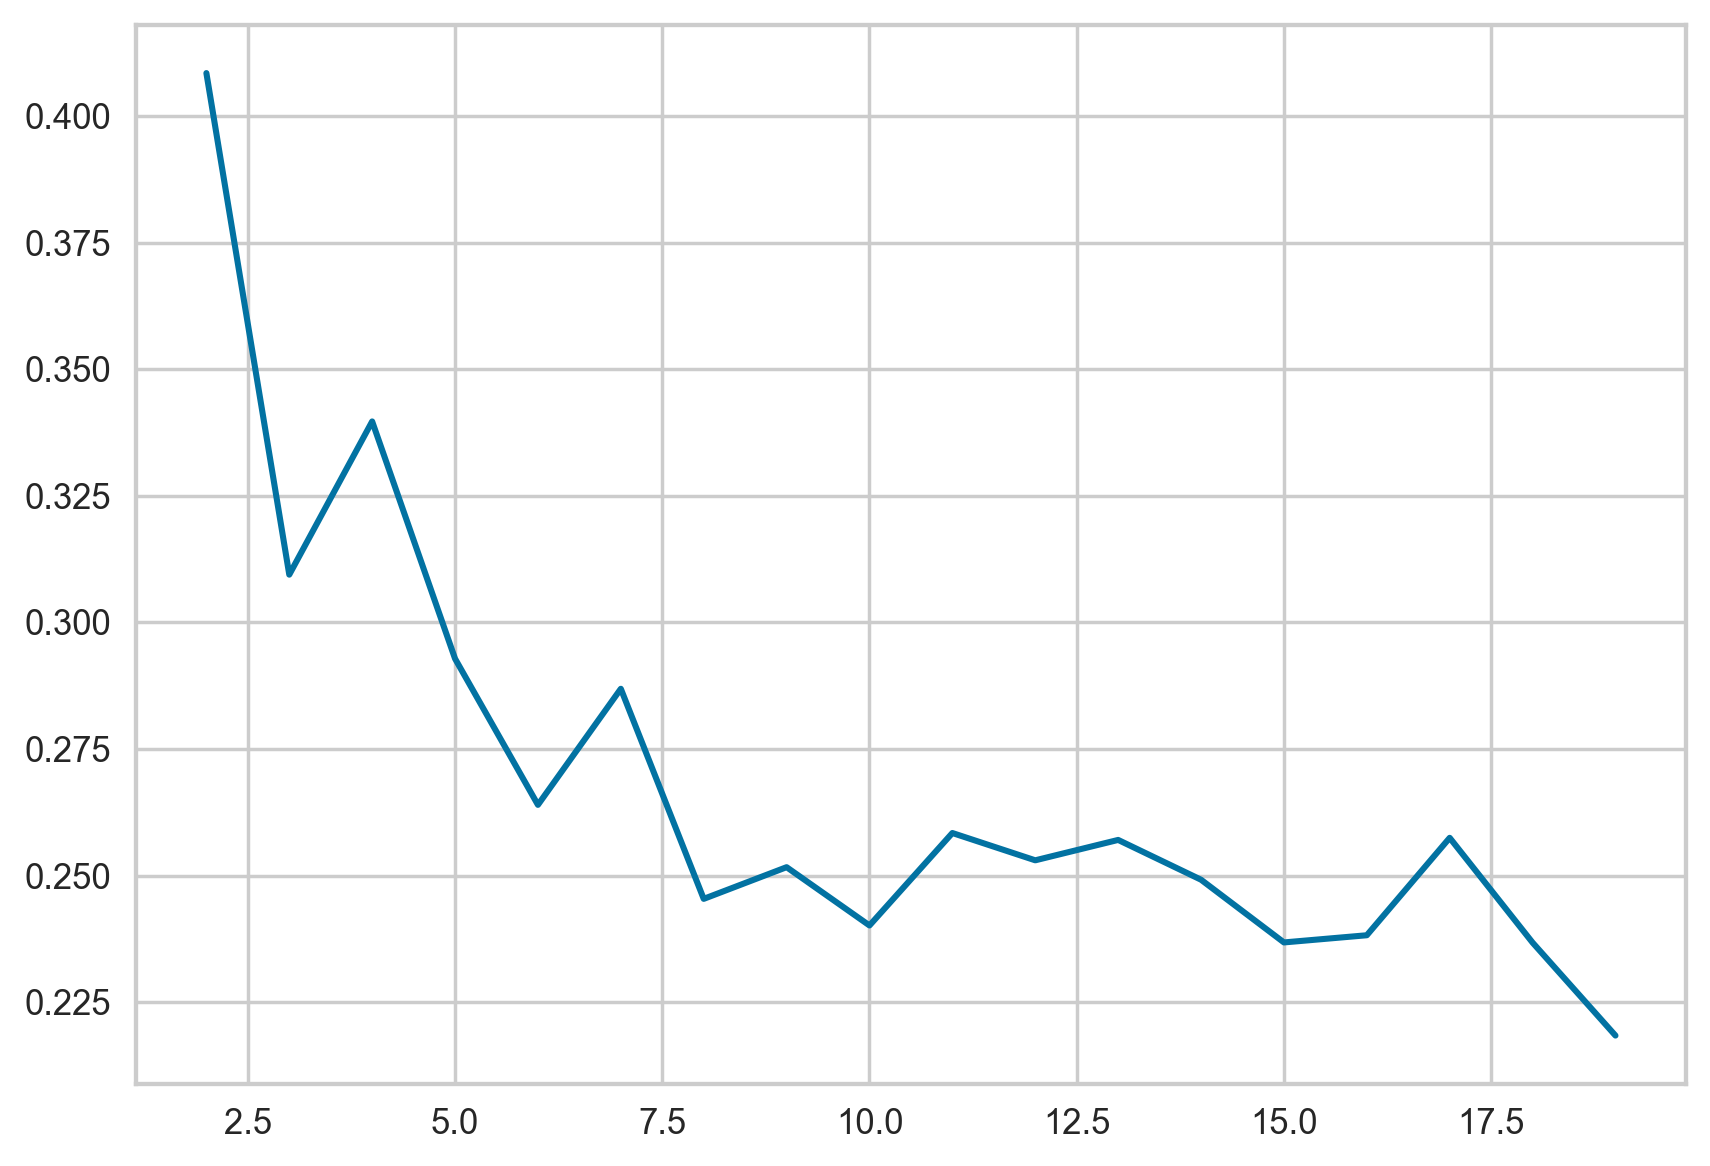

In [25]:
sil_score
plt.plot(range(2,20),sil_score)

In [26]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,2


In [27]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.815385,257.384615,76.000000,33.192308
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250


Based on these average values, we can make some general observations:

Cluster 0: This cluster has relatively low values for Murder, Assault, and Rape, indicating lower crime rates in these categories. The UrbanPop value is moderate.

Cluster 1: This cluster has higher values for Murder, Assault, UrbanPop, and Rape, suggesting higher crime rates and larger urban populations.

Cluster 2: This cluster has the lowest values for Murder, Assault, and UrbanPop, indicating lower crime rates and smaller urban populations. The Rape value is also low.

Cluster 3: This cluster has the highest values for Murder and Assault, suggesting higher crime rates in these categories. The UrbanPop value is moderate, and the Rape value is relatively high.

NOTE: that these interpretations are based on the average values of the variables within each cluster. The specific interpretation and context may vary depending on the specific dataset and domain knowledge.